Import packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

Computing gradients

In [2]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x**2
grad = tape.gradient(y, x)
print(f"y = {y}")
print(f"grad = {grad}")

y = 16.0
grad = 8.0


Computing gradients

![](https://i.imgur.com/jVfVhBu.png)

In [3]:
x = tf.ones([1, 5])
y = tf.zeros(3)
w = tf.Variable(tf.ones([5, 3]), name='w')
b = tf.Variable(tf.zeros([3]), name='b')

with tf.GradientTape(persistent=True) as tape:
    z = x @ w + b
    loss = tf.reduce_mean((z-y)**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(dl_dw)
print(dl_db)

tf.Tensor(
[[3.3333335 3.3333335 3.3333335]
 [3.3333335 3.3333335 3.3333335]
 [3.3333335 3.3333335 3.3333335]
 [3.3333335 3.3333335 3.3333335]
 [3.3333335 3.3333335 3.3333335]], shape=(5, 3), dtype=float32)
tf.Tensor([3.3333335 3.3333335 3.3333335], shape=(3,), dtype=float32)


Gradient Descent

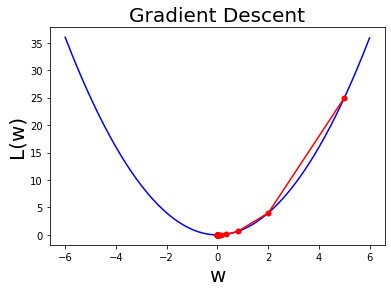

In [4]:
def func(x):
    return x ** 2

def dfunc(x):
    x = tf.Variable(float(x))
    with tf.GradientTape(persistent=True) as tape:
        y = func(x)
    return tape.gradient(y, x)

def GradientDescent(w_inti, epochs, lr):
    history = np.zeros(epochs+1)
    w = w_inti
    history[0] = w
    for i in range(epochs):
        dw = dfunc(w)
        w -= dw * lr
        history[i+1] = w
    return history

w_inti = 5
epochs = 15
lr = 0.3

w = np.arange(-6.0, 6.0, 0.01)
plt.plot(w, func(w), c='b')

history = GradientDescent(w_inti, epochs, lr)
plt.plot(history, func(history), c='r', marker='o', markersize=5)

plt.title('Gradient Descent', fontsize=20)
plt.xlabel('w', fontsize=20)
plt.ylabel('L(w)', fontsize=20)
plt.show()

Simple Linear Regression

In [5]:
def MSE(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

def predict(X, w, b):
    return w * X + b

@tf.function
def train_step(w, b, X, y, lr):
    with tf.GradientTape() as tape:
        tape.watch(X)
        y_pred = predict(X, w, b)
        loss = MSE(y, y_pred)
        
    dw, db = tape.gradient(loss, [w, b])

    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)
    return loss

def train(X, y, epochs=100, lr=0.0001):
    X = tf.constant(X, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    w = tf.Variable(tf.ones([1]))
    b = tf.Variable(tf.zeros([1]))
    loss_list = np.zeros((epochs))

    for epoch in range(epochs):
        loss = train_step(w, b, X, y, lr)
        loss_list[epoch] = loss.numpy().item()

    return w.numpy().item(), b.numpy().item(), loss_list

In [6]:
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 

X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [7]:
w, b, loss_list = train(X, y, epochs=50000)
print(f'w={w}, b={b}')

w=0.9038912057876587, b=2.750936269760132


In [8]:
coef = np.polyfit(X, y, deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.8980486323068566, b=2.953413107424617


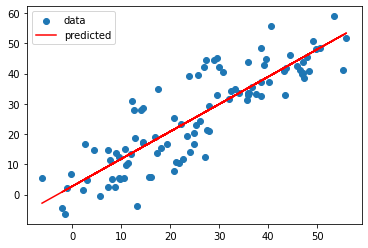

In [9]:
plt.scatter(X, y, label='data')
plt.plot(X, w * X + b, 'r-', label='predicted')
plt.legend()
plt.show()

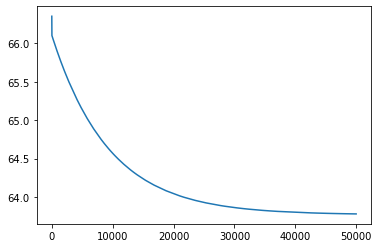

In [10]:
plt.plot(loss_list)
plt.show()

Simple Linear Regression with optimizer

In [11]:
@tf.function
def train_step(X, y, model, loss_fn, optimizer):
    with tf.GradientTape() as tape:
        tape.watch(X)
        y_pred = model(X)
        loss = loss_fn(y, y_pred)

    gradients = tape.gradient(loss, model.trainable_variables)

    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def train(X, y, epochs=100, lr=0.0001):
    X = tf.constant(X, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
        ])
    loss_fn = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    loss_list = np.zeros((epochs))
    for epoch in range(epochs):
        loss = train_step(X, y, model, loss_fn, optimizer)
        loss_list[epoch] = loss.numpy().item()
    
    w, b = model.layers[0].weights
    w = w.numpy()[0][0]
    b = b.numpy()[0]

    return w, b, loss_list

In [12]:
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

In [13]:
w, b, loss_list = train(X.reshape(-1, 1), y.reshape(-1, 1), epochs=50000)
print(f'w={w}, b={b}')

w=0.8806827664375305, b=3.1474239826202393


In [14]:
coef = np.polyfit(X, y, deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.8806844196937823, b=3.1474246704277866


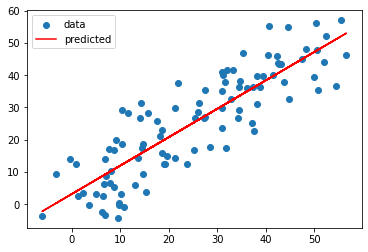

In [15]:
plt.scatter(X, y, label='data')
plt.plot(X, w * X + b, 'r-', label='predicted')
plt.legend()
plt.show()

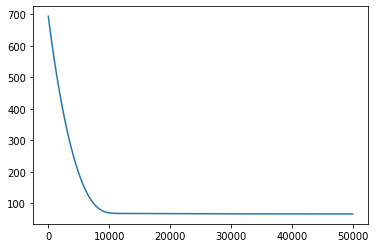

In [16]:
plt.plot(loss_list)
plt.show()